**Imports:**

In [1]:
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

import ipywidgets as widgets

$$
\begin{align}
v(r,m,\Delta) &= \max_{c_{1},c_{2}\in\mathbb{R}_{++}^{2}}\ln(c_{1})+\beta\ln(c_{2}) \\
& \text{u.b.b.} \\
c_{1}+\frac{c_{2}}{1+r}&\leq\Delta m+\frac{(1-\Delta)m}{1+r} \\
\end{align}
$$

# Functions

In [2]:
# solve for consumption
def solve(beta,m,r,Delta_vec):
    
    w = Delta_vec*m + (1-Delta_vec)*m/(1+r)
    fac = beta*(1+r)
    c1 = w/(1+fac/(1+r))
    c2 = fac*c1
    
    return c1,c2

# evaluate utility
u_func = lambda c1,c2,beta: np.log(c1) + np.log(c2)

In [3]:
beta = 1.0
m = 2.0
ro = 0.0
rl = 1.0

In [4]:
Ndelta = 1000
Delta_vec = np.linspace(1e-8,1.0-1e-8,Ndelta)

# Plot

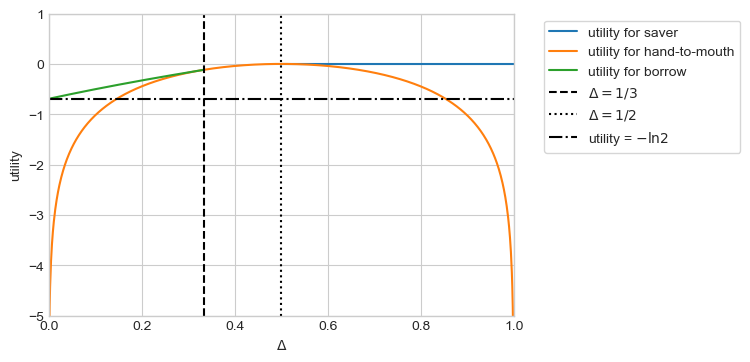

In [5]:
fig = plt.figure(figsize=(6,6/1.5),dpi=100)
ax = fig.add_subplot(1,1,1)

# saver
c1,c2 = solve(beta,m,ro,Delta_vec)
I = c1 <= Delta_vec*m
uo = u_func(c1[I],c2[I],beta)
ax.plot(Delta_vec[I],uo,label='utility for saver')

# hand-to-moth
c1 = Delta_vec*m
c2 = (1-Delta_vec)*m
umid = u_func(c1,c2,beta)
ax.plot(Delta_vec,umid,label='utility for hand-to-mouth')

# borrower
c1,c2 = solve(beta,m,rl,Delta_vec)
I = c1 > Delta_vec*m
ul = u_func(c1[I],c2[I],beta)
ax.plot(Delta_vec[I],ul,label='utility for borrow')

# lines
ax.axvline(1/3,color='black',ls='--',label='$\Delta = 1/3$')
ax.axvline(1/2,color='black',ls=':',label='$\Delta = 1/2$')
ax.axhline(-np.log(2),color='black',ls='-.',label='utility = $-\ln2$')

# legend and details
lgd = ax.legend(frameon=True,ncol=1,bbox_to_anchor=(1.05, 1), loc='upper left',)

ax.set_xlim([0.0,1.0])
ax.set_ylim([-5.0,1.0])
ax.set_xlabel('$\Delta$')
ax.set_ylabel('utility');

In [6]:
#fig.savefig(f'Lec4_Consumption.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')